# H·ªç v√† T√™n
# MSSV

### C√¢u 1 (2 ƒëi·ªÉm): Cho m·ªôt ·∫£nh b·∫•t k·ª≥ (t√™n ·∫£nh do sinh vi√™n t·ª± ƒë·∫∑t, v√≠ d·ª•: `my_image.jpg`) v√† th·ª±c hi·ªán c√°c y√™u c·∫ßu sau:

* Vi·∫øt ch∆∞∆°ng tr√¨nh s·ª≠ d·ª•ng Bilateral filter ƒë·ªÉ l√†m m·ªãn ·∫£nh. (0.5 ƒëi·ªÉm)  
* Vi·∫øt ch∆∞∆°ng tr√¨nh s·ª≠ d·ª•ng Canny Edge Detection ƒë·ªÉ x√°c ƒë·ªãnh bi√™n c·ªßa h√¨nh ·∫£nh. (0.5 ƒëi·ªÉm)  
* ƒê·ªïi m√†u ·∫£nh b·∫±ng c√°ch ho√°n ƒë·ªïi k√™nh m√†u theo th·ª© t·ª± (v√≠ d·ª•: BGR ‚Üí BRG) v√† l∆∞u th√†nh t√™n d·∫°ng `[ten_anh]_swapped.jpg`. (0.5 ƒëi·ªÉm)  
* Chuy·ªÉn ·∫£nh sang kh√¥ng gian m√†u YCrCb v√† t√°ch ri√™ng 3 k√™nh Y, Cr, Cb, l∆∞u th√†nh ·∫£nh grayscale t∆∞∆°ng ·ª©ng (`[ten_anh]_Y.jpg`, `[ten_anh]_Cr.jpg`, `[ten_anh]_Cb.jpg`). (0.5 ƒëi·ªÉm)


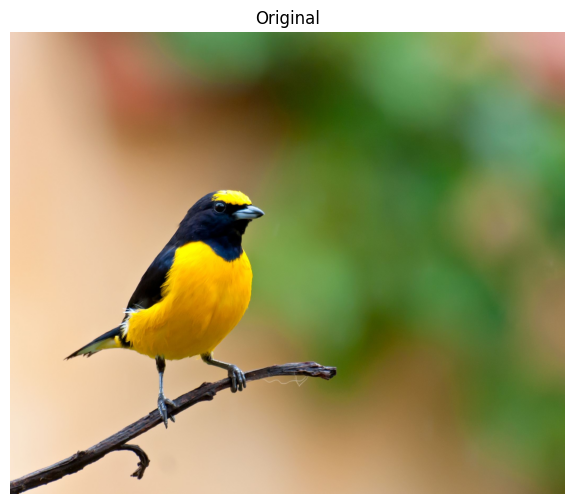

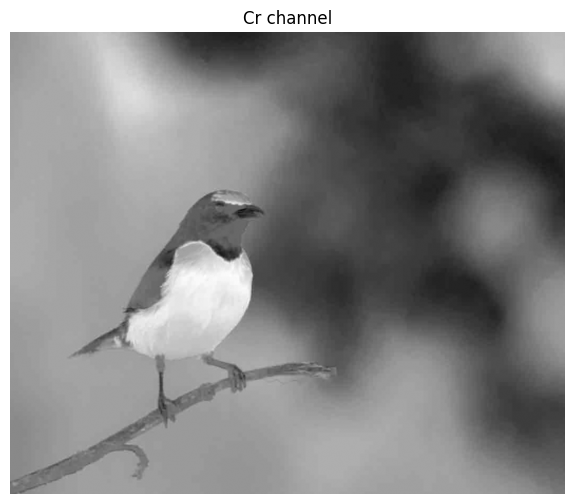

In [6]:
# C√¢u 1: X·ª≠ l√Ω ·∫£nh v·ªõi OpenCV

import cv2
import numpy as np

image_name = 'bird.jpg'
img = cv2.imread(image_name)

bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
cv2.imwrite(f"{image_name.split('.')[0]}_bilateral.jpg", bilateral)

edges = cv2.Canny(img, 100, 200)
cv2.imwrite(f"{image_name.split('.')[0]}_canny.jpg", edges)

swapped = img.copy()
swapped[:, :, [1, 2]] = swapped[:, :, [2, 1]]  
cv2.imwrite(f"{image_name.split('.')[0]}_swapped.jpg", swapped)

ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(ycrcb)
cv2.imwrite(f"{image_name.split('.')[0]}_Y.jpg", Y)
cv2.imwrite(f"{image_name.split('.')[0]}_Cr.jpg", Cr)
cv2.imwrite(f"{image_name.split('.')[0]}_Cb.jpg", Cb)
%matplotlib inline
import matplotlib.pyplot as plt

def show_img(title, img, cmap=None):
	plt.figure(figsize=(8, 6))
	if img.ndim == 2:
		plt.imshow(img, cmap=cmap)
	else:
		plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
	plt.title(title)
	plt.axis('off')
	plt.show()

show_img("Original", img)
show_img("Bilateral", bilateral)
show_img("Canny", edges, cmap='gray')
show_img("Swapped", swapped)
show_img("Y channel", Y, cmap='gray')
show_img("Cr channel", Cr, cmap='gray')
show_img("Cb channel", Cb, cmap='gray')

### C√¢u 2 (4 ƒëi·ªÉm) Vi·∫øt m·ªôt ch∆∞∆°ng tr√¨nh Python s·ª≠ d·ª•ng OpenCV ƒë·ªÉ t·∫°o menu t∆∞∆°ng t√°c cho ph√©p ng∆∞·ªùi d√πng ch·ªçn c√°c k·ªπ thu·∫≠t bi·∫øn ƒë·ªïi h√¨nh h·ªçc v√† x·ª≠ l√Ω ·∫£nh n√¢ng cao t·ª´ m·ªôt danh s√°ch, √°p d·ª•ng ƒë·ªìng th·ªùi cho nhi·ªÅu ·∫£nh.

### Y√™u c·∫ßu:

1. Menu g·ªìm:  
* Ph√≥ng to ·∫£nh (Zoom b·∫±ng resize) (0.5 ƒëi·ªÉm)  
* Xoay ·∫£nh (g√≥c ng·∫´u nhi√™n t·ª´ 0‚Äì360 ƒë·ªô) (0.5 ƒëi·ªÉm)  
* L·∫≠t ·∫£nh ngang (0.5 ƒëi·ªÉm)  
* L·∫≠t ·∫£nh d·ªçc (0.5 ƒëi·ªÉm)  
* C·∫Øt ·∫£nh (crop ng·∫´u nhi√™n v√πng gi·ªØa ·∫£nh) (0.5 ƒëi·ªÉm)  
* Th√™m vi·ªÅn (padding m√†u ng·∫´u nhi√™n) (0.5 ƒëi·ªÉm)

2. Ch∆∞∆°ng tr√¨nh x·ª≠ l√Ω ƒë·ªìng th·ªùi 3 ·∫£nh b·∫•t k·ª≥ do sinh vi√™n t·ª± ch·ªçn (c√≥ th·ªÉ ch·ªçn b·∫±ng ƒë∆∞·ªùng d·∫´n file ho·∫∑c nh·∫≠p t√™n ·∫£nh t√πy √Ω). (0.5 ƒëi·ªÉm)

3. Ph√≠m t∆∞∆°ng ·ª©ng ƒë·ªÉ k√≠ch ho·∫°t c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω:  
* Z: Zoom  
* T: Rotate  
* H: Horizontal Flip  
* V: Vertical Flip  
* C: Crop  
* P: Padding (0.5 ƒëi·ªÉm)

4. L∆∞u file k·∫øt qu·∫£ v·ªõi ƒë·ªãnh d·∫°ng: `result_[ph∆∞∆°ng ph√°p]_[t√™n ·∫£nh g·ªëc].jpg`  
   V√≠ d·ª•: `result_crop_cat.jpg`, `result_rotate_image1.jpg` (0.5 ƒëi·ªÉm)


In [16]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bird.jpg')
img2 = cv2.imread('dalat.jpg')
img3 = cv2.imread('geometric.png')

if img1 is None or img2 is None or img3 is None:
    print(" M·ªôt ho·∫∑c nhi·ªÅu ·∫£nh kh√¥ng ƒë∆∞·ª£c t√¨m th·∫•y. Ki·ªÉm tra t√™n ·∫£nh.")
    exit()

def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))

(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
img2_rotated = cv2.warpAffine(img2, M, (new_w, new_h))

img3_resized = cv2.resize(img3, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
img3_filtered = cv2.bilateralFilter(img3_resized, d=9, sigmaColor=75, sigmaSpace=75)
alpha = 1.5
beta = 40
img3_adjusted = cv2.convertScaleAbs(img3_filtered, alpha=alpha, beta=beta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(img1_border))
plt.title("·∫¢nh 1 - Vi·ªÅn ƒëen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(img2_rotated))
plt.title("·∫¢nh 2 - Xoay 45¬∞, Scale 1.5x")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(img3_adjusted))
plt.title("·∫¢nh 3 - Resize, L·ªçc, S√°ng/Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt

input_image_names = ["bird.JPG", "dalat.JPG", "geometric.png"]

def zoom_image(image, scale=2.0):
    height, width = image.shape[:2]
    return cv2.resize(image, (int(width * scale), int(height * scale)))

def rotate_image(image):
    angle = random.randint(0, 360)
    height, width = image.shape[:2]
    M = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    return cv2.warpAffine(image, M, (width, height))

def flip_horizontal(image):
    return cv2.flip(image, 1)

def flip_vertical(image):
    return cv2.flip(image, 0)

def crop_center(image):
    height, width = image.shape[:2]
    new_h, new_w = int(height * 0.5), int(width * 0.5)
    start_y = height // 2 - new_h // 2
    start_x = width // 2 - new_w // 2
    return image[start_y:start_y + new_h, start_x:start_x + new_w]

def add_padding(image):
    top, bottom, left, right = 20, 20, 20, 20
    color = [random.randint(0, 255) for _ in range(3)]
    return cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

def print_menu():
    print(" Ch·ªçn c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω (nh·∫≠p s·ªë, c√°ch nhau b·∫±ng d·∫•u ph·∫©y):")
    print("1. Ph√≥ng to ·∫£nh (resize)")
    print("2. Xoay ·∫£nh (g√≥c ng·∫´u nhi√™n)")
    print("3. L·∫≠t ·∫£nh ngang")
    print("4. L·∫≠t ·∫£nh d·ªçc")
    print("5. C·∫Øt v√πng gi·ªØa ·∫£nh")
    print("6. Th√™m vi·ªÅn m√†u ng·∫´u nhi√™n")

def apply_transformations(image, choices):
    for choice in choices:
        if choice == "1":
            image = zoom_image(image)
        elif choice == "2":
            image = rotate_image(image)
        elif choice == "3":
            image = flip_horizontal(image)
        elif choice == "4":
            image = flip_vertical(image)
        elif choice == "5":
            image = crop_center(image)
        elif choice == "6":
            image = add_padding(image)
    return image

print_menu()
user_input = input("üëâ Nh·∫≠p l·ª±a ch·ªçn (v√≠ d·ª•: 1,2,5): ")
selected_ops = user_input.strip().split(",")

os.makedirs("output", exist_ok=True)

processed_images = [] 
titles = []           

for name in input_image_names:
    if not os.path.exists(name):
        print(f" Kh√¥ng t√¨m th·∫•y ·∫£nh: {name}")
        continue

    image = cv2.imread(name)
    if image is None:
        print(f" Kh√¥ng th·ªÉ ƒë·ªçc ·∫£nh: {name}")
        continue

    result_image = apply_transformations(image, selected_ops)

    output_name = f"output/processed_{name}"
    cv2.imwrite(output_name, result_image)
    print(f"‚úÖ ·∫¢nh sau x·ª≠ l√Ω ƒë√£ l∆∞u t·∫°i: {output_name}")


    result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    processed_images.append(result_rgb)
    titles.append(f"{name} (processed)")

plt.figure(figsize=(15, 5))
for i, img in enumerate(processed_images):
    plt.subplot(1, len(processed_images), i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


 Ch·ªçn c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω (nh·∫≠p s·ªë, c√°ch nhau b·∫±ng d·∫•u ph·∫©y):
1. Ph√≥ng to ·∫£nh (resize)
2. Xoay ·∫£nh (g√≥c ng·∫´u nhi√™n)
3. L·∫≠t ·∫£nh ngang
4. L·∫≠t ·∫£nh d·ªçc
5. C·∫Øt v√πng gi·ªØa ·∫£nh
6. Th√™m vi·ªÅn m√†u ng·∫´u nhi√™n
‚úÖ ·∫¢nh sau x·ª≠ l√Ω ƒë√£ l∆∞u t·∫°i: output/processed_bird.JPG
‚úÖ ·∫¢nh sau x·ª≠ l√Ω ƒë√£ l∆∞u t·∫°i: output/processed_dalat.JPG
‚úÖ ·∫¢nh sau x·ª≠ l√Ω ƒë√£ l∆∞u t·∫°i: output/processed_geometric.png


### C√¢u 3 (4 ƒëi·ªÉm) Vi·∫øt m·ªôt ch∆∞∆°ng tr√¨nh Python ƒë·ªÉ x·ª≠ l√Ω 3 ·∫£nh b·∫•t k·ª≥ do sinh vi√™n t·ª± ch·ªçn.

* Th√™m vi·ªÅn ƒëen 20 pixel cho ·∫£nh ƒë·∫ßu ti√™n. (0.5 ƒëi·ªÉm)  
* Xoay ·∫£nh th·ª© hai 45 ƒë·ªô v√† ph√≥ng to 1.5 l·∫ßn. (0.5 ƒëi·ªÉm)  
* TƒÉng k√≠ch th∆∞·ªõc ·∫£nh th·ª© ba l√™n 4 l·∫ßn, sau ƒë√≥ √°p d·ª•ng Bilateral Filter v·ªõi tham s·ªë t√πy ch·ªçn. (1.5 ƒëi·ªÉm)  
* Thay ƒë·ªïi ƒë·ªô s√°ng v√† ƒë·ªô t∆∞∆°ng ph·∫£n ·∫£nh th·ª© ba theo c√¥ng th·ª©c:

$$
I_{out}(x, y) = \alpha \cdot I_{in}(x, y) + \beta
$$

Trong ƒë√≥:  

$$
\alpha \in [0.6, 2.0], \quad \beta \in [-60, 60]
$$

Gi√° tr·ªã ƒë·∫ßu ra c·∫ßn ƒë∆∞·ª£c gi·ªõi h·∫°n trong kho·∫£ng [0, 255] b·∫±ng c√¥ng th·ª©c:

$$
I_{out}(x, y) = \text{clip}(I_{out}(x, y), 0, 255)
$$


In [14]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('bird.jpg')
img2 = cv2.imread('geometric.png')
img3 = cv2.imread('dalat.jpg')

if img1 is None or img2 is None or img3 is None:
    print(" M·ªôt ho·∫∑c nhi·ªÅu ·∫£nh kh√¥ng ƒë∆∞·ª£c t√¨m th·∫•y. Ki·ªÉm tra t√™n ·∫£nh.")
    exit()

def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img1_border = cv2.copyMakeBorder(img1, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=(0, 0, 0))

(h, w) = img2.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.5)
cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))
M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]
img2_rotated = cv2.warpAffine(img2, M, (new_w, new_h))

img3_resized = cv2.resize(img3, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
img3_filtered = cv2.bilateralFilter(img3_resized, d=9, sigmaColor=75, sigmaSpace=75)
alpha = 1.5
beta = 40
img3_adjusted = cv2.convertScaleAbs(img3_filtered, alpha=alpha, beta=beta)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(bgr_to_rgb(img1_border))
plt.title("·∫¢nh 1 - Vi·ªÅn ƒëen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bgr_to_rgb(img2_rotated))
plt.title("·∫¢nh 2 - Xoay 45¬∞, Scale 1.5x")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bgr_to_rgb(img3_adjusted))
plt.title("·∫¢nh 3 - Resize, L·ªçc, S√°ng/Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()


# Ch√∫c c√°c b·∫°n thi may m·∫Øn v√† ƒë·∫°t ƒëi·ªÉm 10.